<a href="https://colab.research.google.com/github/miasuarezco/AlgorithmsUN2024I/blob/main/LabLML/miasuarezco_LML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding maximum number for an array with n numbers with a Neural Network (MLPRegressor)

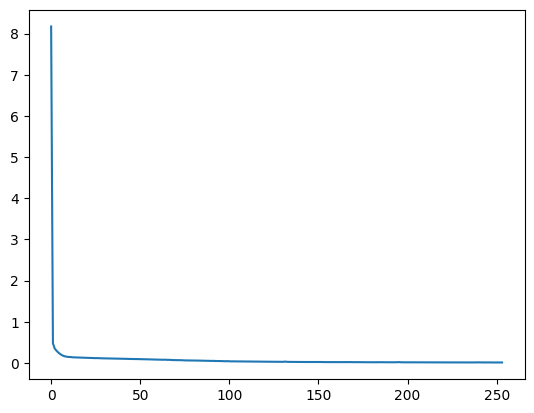


Some data before the actual results:

Accuracy testing : 0.999
The mean error is 0.11754420481480904
The mean error with y_pred rounded is 0.005666666666666667



,X,y,y_pred_round,error_b_round,y_pred,error
0,"[0, 6, 1, 9, 1, 9, 6, 6, 7, 7]",9,9,0,9.040700,0.040700
1,"[10, 7, 2, 10, 8, 10, 4, 3, 8, 7]",10,10,0,10.059058,0.059058
2,"[8, 8, 4, 8, 5, 0, 2, 7, 9, 10]",10,10,0,9.533827,0.466173
3,"[2, 3, 7, 7, 3, 0, 8, 2, 5, 6]",8,8,0,7.901175,0.098825
4,"[4, 7, 3, 8, 6, 4, 0, 1, 0, 8]",8,8,0,8.108466,0.108466
...,...,...,...,...,...,...
8995,"[16, 14, 6, 10, 18, 4, 2, 12, 0, 8]",18,18,0,17.884520,0.115480
8996,"[18, 16, 12, 6, 10, 4, 2, 0, 8, 14]",18,18,0,17.754373,0.245627
8997,"[6, 16, 4, 14, 10, 12, 18, 2, 0, 8]",18,18,0,17.807516,0.192484
8998,"[8, 10, 18, 16, 2, 0, 14, 6, 4, 12]",18,18,0,17.708588,0.291412


In [2]:
# Without organizing the numbers
import random as rnd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd

n=10
minNumber = 0
maxNumber = 10
Nexamples=3000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.max(curr))

for j in range(Nexamples):
  list1 = list(np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))
  y.append(np.max(list1))

for j in range(Nexamples):
  list1 = list(2*np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))
  y.append(np.max(list1))

model = MLPRegressor(hidden_layer_sizes=(100,50,20), max_iter=1000, activation='relu').fit(X,y)
y_pred =model.predict(X)


plt.plot(model.loss_curve_)
plt.show()

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a for a in y], 'y_pred_round':[round(a) for a in y_pred], 'error_b_round':[abs(a-round(b)) for a,b in zip(y, y_pred)], 'y_pred':[a for a in y_pred], 'error':[abs(a-b) for a,b in zip(y, y_pred)]})
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print(f"The mean error with y_pred rounded is {data.loc[:, 'error_b_round'].mean()}")
print()
data

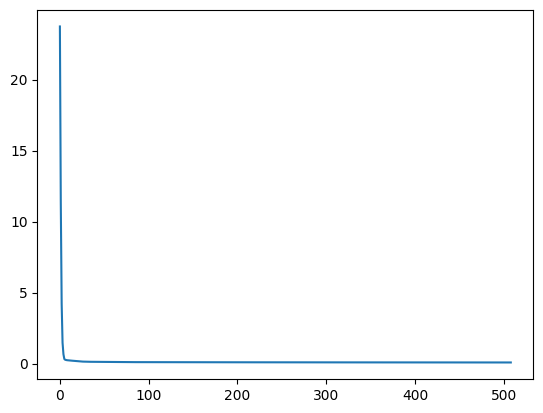


Some data before the actual results:

Accuracy testing : 0.914
The mean error is 0.25669752471197155



,X,y,y_pred,error
0,"[1, 2, 10, 0, 1, 6, 0, 6, 7, 0]",10,9.454016,0.545984
1,"[7, 5, 5, 10, 0, 9, 10, 4, 5, 2]",10,10.467741,0.467741
2,"[6, 0, 4, 2, 10, 8, 9, 1, 5, 5]",10,10.044301,0.044301
3,"[0, 2, 4, 4, 7, 6, 7, 10, 3, 8]",10,9.633078,0.366922
4,"[2, 3, 8, 1, 5, 7, 10, 0, 5, 4]",10,9.874022,0.125978
...,...,...,...,...
2995,"[0, 2, 12, 18, 8, 4, 16, 14, 6, 10]",18,18.273584,0.273584
2996,"[12, 4, 6, 2, 8, 14, 0, 16, 18, 10]",18,18.260080,0.260080
2997,"[6, 2, 14, 10, 0, 12, 8, 4, 18, 16]",18,18.026940,0.026940
2998,"[4, 12, 10, 0, 18, 14, 8, 2, 6, 16]",18,18.274290,0.274290


In [3]:
# Organizing the numbers
import random as rnd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd

maxNumber = 10
n = maxNumber
minNumber = 0
Nexamples = 1000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.sort(curr))

for j in range(Nexamples):
  y.append(np.array(range(n)))
  list1 = list(np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))

for j in range(Nexamples):
  y.append(2*np.array(range(n)))
  list1 = list(2*np.array(range(n)))
  rnd.shuffle(list1)
  X.append(np.array(list1))

model = MLPRegressor(hidden_layer_sizes=(100,50,20), max_iter=1000, activation='relu').fit(X,y)
y_pred =model.predict(X)

plt.plot(model.loss_curve_)
plt.show()

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a[-1] for a in y], 'y_pred':[a[-1] for a in y_pred]})
data['error'] = (data['y'] - data['y_pred']).abs()
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print()
data

# Finding maximum number for an array with n numbers with a Classification and Regression Tree (CART)

In [4]:
# Without organizing the numbers
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd

n=10
minNumber = 0
maxNumber = 10
Nexamples=3000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.max(curr))

for j in range(Nexamples):
    list1 = list(range(n))
    rnd.shuffle(list1)
    X.append(np.array(list1))
    y.append(np.max(list1))

for j in range(Nexamples):
    list1 = list(2*np.array(range(n)))
    rnd.shuffle(list1)
    X.append(np.array(list1))
    y.append(np.max(list1))

model = DecisionTreeRegressor(max_leaf_nodes = 15).fit(X,y)
y_pred = model.predict(X)

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a for a in y], 'y_pred_round':[round(a) for a in y_pred], 'error_b_round':[abs(a-round(b)) for a,b in zip(y, y_pred)], 'y_pred':[a for a in y_pred], 'error':[abs(a-b) for a,b in zip(y, y_pred)]})
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print(f"The mean error with y_pred rounded is {data.loc[:, 'error_b_round'].mean()}")
print()
data


Some data before the actual results:

Accuracy testing : 0.992
The mean error is 0.10642440556303273
The mean error with y_pred rounded is 0.09466666666666666



,X,y,y_pred_round,error_b_round,y_pred,error
0,"[1, 7, 6, 5, 6, 3, 6, 1, 10, 3]",10,10,0,10.000000,0.000000
1,"[0, 6, 8, 2, 2, 0, 0, 0, 5, 1]",8,9,1,8.971736,0.971736
2,"[8, 8, 9, 7, 4, 8, 9, 5, 0, 7]",9,9,0,8.971736,0.028264
3,"[10, 2, 4, 3, 7, 4, 3, 3, 6, 4]",10,10,0,10.000000,0.000000
4,"[8, 2, 4, 1, 10, 2, 0, 3, 8, 6]",10,10,0,10.000000,0.000000
...,...,...,...,...,...,...
8995,"[4, 10, 6, 16, 18, 8, 2, 0, 14, 12]",18,18,0,18.000000,0.000000
8996,"[12, 0, 4, 16, 8, 14, 6, 18, 10, 2]",18,18,0,18.000000,0.000000
8997,"[4, 2, 10, 18, 16, 14, 6, 0, 12, 8]",18,18,0,18.000000,0.000000
8998,"[6, 2, 14, 0, 12, 4, 16, 10, 18, 8]",18,18,0,18.000000,0.000000


In [5]:
# Organizing the numbers
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd

n=10
minNumber = 0
maxNumber = 10
Nexamples=3000

X =[]
y =[]

for j in range(Nexamples):
  curr = np.array([rnd.randint(minNumber, maxNumber) for a in range(n)])
  X.append(curr)
  y.append(np.sort(curr))

for j in range(Nexamples):
    y.append(np.array(range(n)))
    list1 = list(range(n))
    rnd.shuffle(list1)
    X.append(np.array(list1))

for j in range(Nexamples):
    y.append(2*np.array(range(n)))
    list1 = list(2*np.array(range(n)))
    rnd.shuffle(list1)
    X.append(np.array(list1))

model = DecisionTreeRegressor(max_leaf_nodes = 50).fit(X,y)
y_pred = model.predict(X)

print()
print("Some data before the actual results:")
print()
print('Accuracy testing : {:.3f}'.format(model.score(X,y)))

data = pd.DataFrame({'X': [a for a in X], 'y':[a[-1] for a in y], 'y_pred':[a[-1] for a in y_pred]})
data['error'] = (data['y'] - data['y_pred']).abs()
print(f"The mean error is {data.loc[:, 'error'].mean()}")
print()
data


Some data before the actual results:

Accuracy testing : 0.742
The mean error is 0.11182416539577819



,X,y,y_pred,error
0,"[1, 10, 8, 10, 0, 8, 1, 4, 6, 0]",10,10.0,0.0
1,"[5, 3, 5, 7, 4, 10, 1, 7, 5, 10]",10,10.0,0.0
2,"[8, 10, 0, 4, 7, 4, 8, 2, 7, 10]",10,10.0,0.0
3,"[2, 10, 9, 1, 2, 7, 5, 10, 10, 9]",10,10.0,0.0
4,"[6, 1, 10, 6, 3, 10, 4, 10, 9, 8]",10,10.0,0.0
...,...,...,...,...
8995,"[16, 2, 0, 4, 6, 8, 18, 12, 10, 14]",18,18.0,0.0
8996,"[16, 10, 6, 0, 4, 8, 2, 12, 18, 14]",18,18.0,0.0
8997,"[8, 4, 16, 0, 14, 6, 18, 2, 10, 12]",18,18.0,0.0
8998,"[2, 12, 4, 8, 16, 0, 10, 14, 18, 6]",18,18.0,0.0
